<a href="https://colab.research.google.com/github/UVARAJAND/To-develop-a-CNN-model-to-classify-images-of-plastic-waste-into-different-categories/blob/main/week2/google_colab_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [23]:
!pip install tensorflow


In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [3]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from cv2 import cvtColor


In [4]:
# change the dataset path based on your dataset location in your computer
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"


In [5]:
#visualization

x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
            img_array=cv2.imread(file)
            img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})
print(data)

100%|██████████| 12565/12565 [00:06<00:00, 1949.95it/s]


                                                   image label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
1      [[[179, 181, 193], [179, 181, 193], [180, 182,...     R
2      [[[188, 188, 188], [188, 188, 188], [188, 188,...     R
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
4      [[[247, 247, 247], [247, 247, 247], [247, 247,...     R
...                                                  ...   ...
22559  [[[64, 55, 48], [63, 54, 47], [63, 54, 47], [6...     O
22560  [[[254, 254, 254], [254, 254, 254], [254, 254,...     O
22561  [[[117, 87, 85], [118, 88, 86], [119, 90, 86],...     O
22562  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
22563  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O

[22564 rows x 2 columns]


In [6]:
data.shape

(22564, 2)

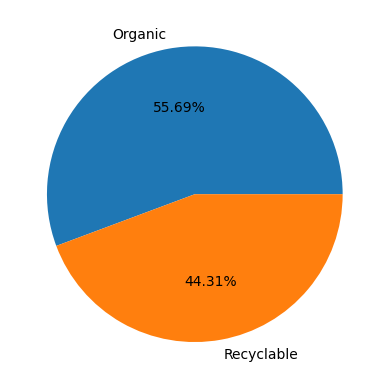

In [7]:
plt.pie(data.label.value_counts(),labels=["Organic","Recyclable"],autopct="%0.2f%%")
plt.show()

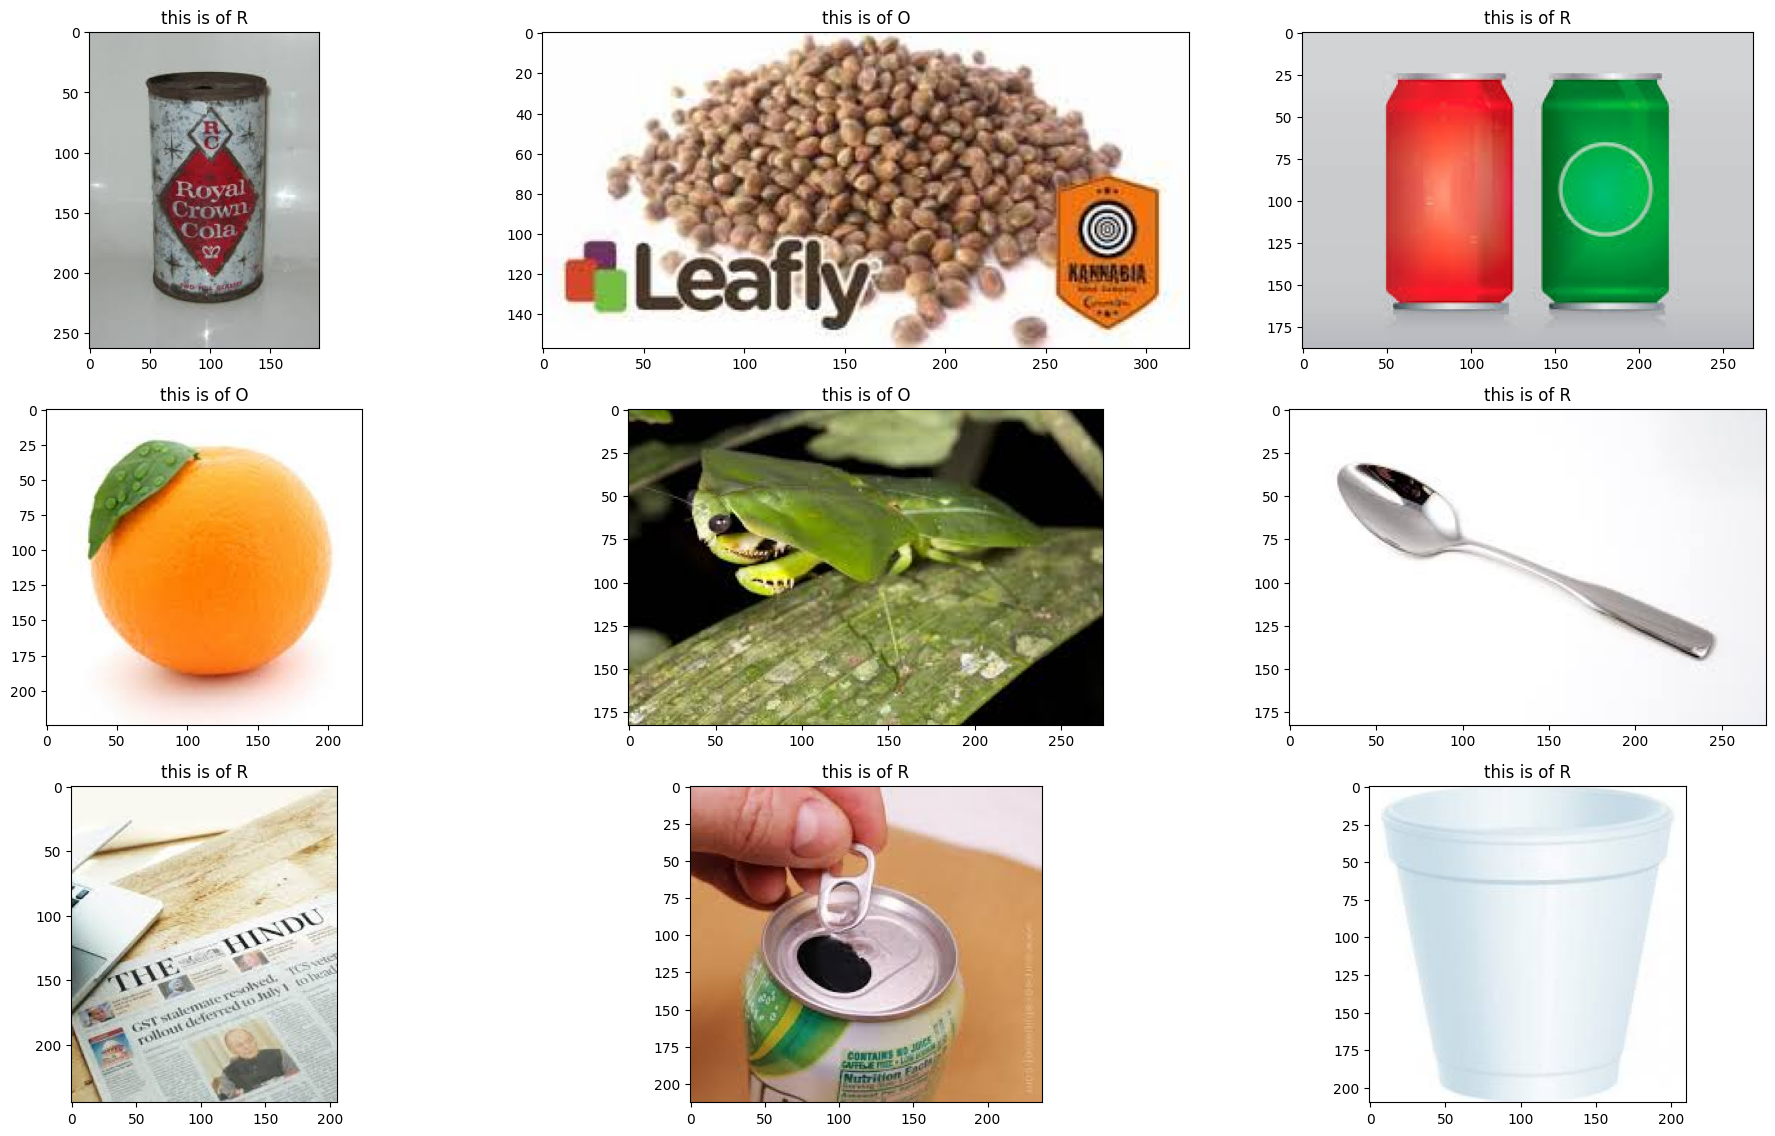

In [8]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('this is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
                            metrics=["accuracy"])
batch_size=64


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
      train_path,
          target_size=(224, 224),
              batch_size=batch_size,
                  color_mode='rgb',
                      class_mode="categorical"
                      )

test_generator = test_datagen.flow_from_directory(
                          test_path,
                              target_size=(224, 224),
                                  batch_size=batch_size,
                                      color_mode='rgb',
                                          class_mode="categorical"
                                          )


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist=model.fit(
      train_generator,
          epochs=20,
              validation_data=test_generator
                  )


Epoch 1/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.7751 - loss: 0.5319 - val_accuracy: 0.8870 - val_loss: 0.3348
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 65s 152ms/step - accuracy: 0.8478 - loss: 0.3830 - val_accuracy: 0.8882 - val_loss: 0.3048
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8566 - loss: 0.3579 - val_accuracy: 0.9085 - val_loss: 0.2485
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8775 - loss: 0.3162 - val_accuracy: 0.8846 - val_loss: 0.2937
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.8882 - loss: 0.2811 - val_accuracy: 0.8695 - val_loss: 0.3206
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.9039 - loss: 0.2484 - val_accuracy: 0.8858 - val_loss: 0.3440
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.9235 - loss: 0.2012 - val_accuracy: 0.8854 - val_loss: 0.3423
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9466 - loss: 0

In [14]:
model.save("first.h5")